In [1]:
%matplotlib inline

In [2]:
import palettable

In [3]:
import numpy as np

In [4]:
import stained_glass.stats as sg_stats
import stained_glass.generate as sg_generate

# Create Random Coordinates

In [5]:
sidelength = 20
f_sls = np.array([ 0.1, 0.5, 0.75, 1. ])
n = 50000

In [6]:
num_den = n / sidelength**2.

In [7]:
n_rrs = []
for i, f_sl in enumerate( f_sls ):
    
    sl = f_sl * sidelength
    
    n_area = int( num_den * sl**2. )
    
    print( n_area )
    
    coords = sg_generate.randoms_in_rectangle( n_area, sl, (0, 0)  )

    n_rr, edges = sg_stats.two_point_autocf(
        coords,
        maxes = np.array([sl, sl]),
        mins = np.array([-sl, -sl]),
        estimator = 'n_dd',
        bins = 64,
    )
    
    n_rrs.append( n_rr )

500
12500
28125
50000


In [8]:
mids = edges[1:] + 0.5 * ( edges[1:] - edges[:-1] )

# Plot Comparison

(0.0, 20.0)

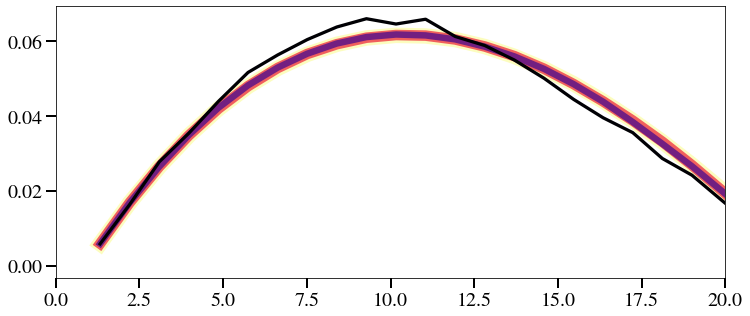

In [9]:
fig = plt.figure( figsize=(12,5), facecolor='w' )
ax = plt.gca()

for i, n_rr in enumerate( n_rrs ):
    line = ax.plot(
        mids,
        n_rr / n_rr.sum(),
        color = palettable.matplotlib.Magma_4.mpl_colors[i],
        linewidth = (i + 2)**1.7,
        zorder = -i,
    )

ax.set_xlim( 0, 20 )
# ax.set_yscale( 'log' )
# ax.set_ylim( 0, 1.05 * n_rr.max() )

Goal: Extend $n_{RR}$ off arbitrarily in either direction.